# Section 42: Tuning Neural Networks

- Study Group: 06/01/20
- online-ds-pt-100719

## Learning Objectives

- Discuss the different options available for tuning neural networks
- Discuss some rules of thumb for tuning Neural Networks

- **ACTIVITY: Use a computer vision task to walk-through hyperparameter tuning (cats vs dogs)**
    - [Zip File on Google Drive](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)

- **Learn how to use GridSearchCV with Keras neural neural networks.**

    - Learn how to examine the other parameter results from a GridSearchCV object.

    - Learn how to create your own custom scorer for sklearn (and why you'd want to)
- Learn how to set up email notifications via Python (for gridsearch results)


## Questions/Comments?
-

## Helpful Resources

- [Medium: Simple Guide to Hyperparameter Tuning in Neural Networks](https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594)
- [Medium: A guide to an efficient way to build neural network architectures- Part I:](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)
- [Medium: Optimizers for Neural Networks](https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

# Overview  - Neural Network Tuning 

## Rules of Thumb for Training Neural Networks

- **Always use a train-test-validation split.**
    - **Train-test-val splits:**
        - Training set: for training the algorithm
        - Validation set: used during training
        - Testing set: after choosing the final model, use the test set for an unbiased estimate of performance.
    - **Set sizes:**
        - With big data, your val and test sets don't necessarily need to be 20-30% of all the data. 
        - You can choose test and hold-out sets that are of size 1-5%. 
            - eg. 96% train, 2% hold-out, 2% test set.
            
            
- Consider using a `np.random.seed` for reproducibility/comparing models


- **Use cross validation of some sort to compare Networks**


- Normalize/Standardize features
    
    
- **Add EarlyStopping and ModelCheckpoint [callbacks](https://keras.io/api/callbacks/)**

    

#### From Learn

- **Rules of thumb re: bias/variance trade-off:**

| High Bias? (training performance) | high variance? (validation performance)  |
|---------------|-------------|
| Use a bigger network|    More data     |
| Train longer | Regularization   |
| Look for other existing NN architextures |Look for other existing NN architextures |


## Rules of Thumb - Hyperparameters to Tune 


- This section is roughly laid out in order of importance/what-to-tune-first
    - [Blog Post](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-i-hyper-parameter-8129009f131b)

### Hyperparameters (For Dense layers)

1. Number of layers (depends on the size of training data)


2. Number of neurons(depends on the size of training data)


3. Activation functions
    - Popular choices:
        - relu / leaky-relu
        - sigmoid / tanh (for shallow networks)
        
        
4. Optimizer:
    - Popular choices:
        - SGD (works well for shallow but gets stuck in local minima/saddle-points - if so use RMSProp)
        - RMSProp
        - Adam (general favorite)
        
        
5. Learning Rate
    - Try in powers of 10 (0.001,0.01,.1,1.0)
    - Which optimizer changes which l.r. is best (but try the others too).
        - SGD: 0.1
        - Adam: 0.001/0.01
    - Can use the `decay` parameter to reduce learning (though it is better to use adaptive optimizer than to adjust this)/.
    
    
6. Initialization
    - Not as important as defaults (glorot-uniform) work well, but:
        - Use He-normal/uniform initialization when using ReLu
        - Use Glorot-normal/uniform when using Sigmoid
    - Avoid using all zeros or any constant for all neurons


7. Batch Size
    - Finding the "right" size is important
        - Too small = weights update too quickly and convergence is difficult
        - Too large = weights update too slowly (plus PC RAM issues)
    - Try batch sizes that are powers of 2 (for memory optimization)
    - Larger is better than smaller.
    
    
8. Number of Epochs:
    - Important parameter to tune
    - Use EarlyStopping callback to prevent overfitting
    

9. Adding Dropout
    - Usually use dropout rate of 0.2 to 0.5
    
    

10. Adding regularization (L1,L2)
    - Use when the model continues to over-fit even after adding Dropout

### Hyperparameter Details

#### Kernel Initialization
- Kernel Initializers
```python
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']```


#### Loss Functions
- MSE (regression)
- categorical cross-entropy (classification with 2D labels )
    - sparse categoricaln cross entropy (classification with 1D labels)
- binary cross-entropy (classification)
    - 2 categories
- can also uses custom scoring functions

#### L1/L2 Regularization

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

- **CHOOSING L1 OR L2:**
    - L1 is very useful when trying to compress a model. (since weights can decreae to 0)
    - L2 is generally preferred otherwise.
    
    
- **USING L1/L2 IN KERAS:**
    - Add a kernel_regulaizer to a  layer.
```python 
from keras import regularizers
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))
```
    - here 0.01 = $\lambda$

#### Early Stopping (not covered in class)

- Monitor performance for decrease or plateau in performance, terminate process when given criteria is reached.

- **In Keras:**
    - Can be applied using the [callbacks function](https://keras.io/callbacks/)
```python    
from keras.callbacks import EarlyStopping
EarlyStopping(monitor='val_err', patience=5)
```
    - 'Monitor' denotes quanitity to check
    - 'val_err' denotes validation error
    - 'pateience' denotes # of epochs without improvement before stopping.
        - Be careful, as sometimes models _will_ continue to improve after a stagnant period


# Activity: Dogs vs Cats

- Build an image classification model to detect cats vs dogs

## Installs, Imports, & Functions

In [1]:
# !pip install -U imageio
# !pip install -U scikit-image

# !pip install pillow
# !pip install opencv-contrib-python
# !pip install -U fsds
# !pip install -U tensorflow

# !pip install -U keras
# !pip install -U pandas 
# !pip install -U pandas-profiling

# %conda update matploltib
# %conda update scikit-learn
# !pip install -U matplotlib

In [2]:
# !pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.21 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical
from imageio import imread

from skimage.transform import resize
import cv2
from tqdm import tqdm


Using TensorFlow backend.


## Loading in the data

- Download the zip file 
    - [DATASET: Zip File for Dog vs Cats](https://drive.google.com/open?id=1WQ0fdJrNs5qVinJ_6rmVIIinOJD3p-n4)
- Extract zip file contents to the a folder on your computer.
    - I am using my user folder > Datasets > cats-vs-dogs
    

In [4]:
import os,glob
print(os.path.abspath(os.curdir))

/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_pt_100719_cohort_notes/Instructor Notebooks/Mod_4_v21/ANNs


In [5]:
# change dataset_folder to match where you stored the files
dataset_folder = "/Users/jamesirving/Datasets/dogs-vs-cats-sorted/"
os.makedirs(dataset_folder,exist_ok=True)
os.listdir(dataset_folder)

['single_prediction', '.DS_Store', 'Models', 'training_set', 'test_set']

In [6]:
base_folder = dataset_folder
base_folder

'/Users/jamesirving/Datasets/dogs-vs-cats-sorted/'

### Preparing Images Using .flow instead of flow_from_directory
- https://discuss.analyticsvidhya.com/t/keras-image-preprocessing-using-flow-and-not-flow-from-directory/69460/2


In [7]:
import shutil,glob
# ## DOG VS CAT
train_base_dir = base_folder+'training_set/'
test_base_dir =base_folder+'test_set/' 

train_dogs = train_base_dir+'dogs/'
train_cats = train_base_dir+'cats/'

test_dogs = test_base_dir+'dogs/'
test_cats = test_base_dir+'cats/'


dog_train_files = glob.glob(train_dogs+'*.jpg')
cat_train_files = glob.glob(train_cats+'*.jpg')
all_train_files = [*dog_train_files,*cat_train_files]

dog_test_files = glob.glob(test_dogs+'*.jpg')
cat_test_files = glob.glob(test_cats+'*.jpg')
all_test_files = [*dog_test_files,*cat_test_files]

# print(len(img_filenames))
# img_filenames[:10]

all_filename_vars = [dog_train_files, cat_train_files,
                                             dog_test_files,cat_test_files]

### Functions

In [8]:
def load_image_cv2(filename, RGB=True):
    """Loads image using cv2 and converts to either matplotlib-RGB (default)
    or grayscale."""
    import cv2

    IMG = cv2.imread(filename)
    if RGB: cmap = cv2.COLOR_BGR2RGB
    else: cmap=cv2.COLOR_BGR2GRAY
    return cv2.cvtColor(IMG,cmap)



# defining a function to read images
def read_img(img_path,target_size=(32,32,3)):#(64, 64, 3)):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)

    return img

def load_train_test_val(dog_training_filenames, cat_training_filenames,
                        dog_test_filenames,cat_test_filenames,
                        img_size=(32,32,3),val_size=0.1):
    """Reads in training and test filenames to produce X and y data splits.
    The validation set is intended to be used during training and is created
    from the training images using train test split.

    ylabels are encoded as 0=cat, 1=dog
    Returns:  X_train, X_test, X_val, y_train, y_test,y_val"""
    # 
    
    display('[i] LOADING IMAGES')
 
    train_img = []
    train_label = []

    for img_path in tqdm(dog_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(1)

    for img_path in tqdm(cat_training_filenames):
        train_img.append(read_img(img_path,target_size=img_size))
        train_label.append(0)


    test_img = []
    test_label = []

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(1)

    for img_path in tqdm(dog_test_files):
        test_img.append(read_img(img_path,target_size=img_size))
        test_label.append(0)
    # print('\n',pd.Series(train_label).value_counts())


    from sklearn.model_selection import train_test_split
    X = np.array(train_img, np.float32)
    y = np.array(train_label)
    y = to_categorical(y)
    
    X_test = np.array(test_img, np.float32)
    y_test = to_categorical(np.array(test_label))
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)
    print('\n[i] Length of Splits:')
    print(f"X_train={len(X_train)}, X_test={len(X_test)}, X_val={len(X_val)}")
    return X_train, X_test, X_val, y_train, y_test,y_val 


def train_test_val_datagens(X_train,X_test,X_val,y_train,y_test,y_val,
                            BATCH_SIZE = 32, train_datagen_kws= dict(
                                shear_range = 0.2, 
                                zoom_range = 0.2,
                                horizontal_flip = True)):
    """Creates ImageDataGenerators for train,test,val data.
    Returns: training_set,test_set,val_set"""
    ## Create training and test data
    from keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale = 1./255,**train_datagen_kws)

    test_datagen = ImageDataGenerator(rescale = 1./255)
    val_datagen = ImageDataGenerator(rescale = 1./255)

    training_set = train_datagen.flow(X_train,y=y_train,batch_size=BATCH_SIZE)
    test_set = test_datagen.flow(X_test,y=y_test,batch_size=BATCH_SIZE)
    val_set = val_datagen.flow(X_val,y=y_val,batch_size=BATCH_SIZE)

    return training_set,test_set,val_set



def get_shapes_dict(training_set,verbose=False):
    shapes = ["Batchsize", "img_width","img_height","img_dim"]
    SHAPES = dict(zip(shapes, training_set[0][0].shape))
    if verbose:
        print('SHAPES DICT:')
        print(SHAPES)
        print(training_set[0][0].shape)
        print('\n[i] Labels for batch (0=cat,1=dog)')
        print(training_set[0][1])
    return SHAPES
      

In [9]:
## USING FUNCTIONS TO LOAD IN IMAGES 
X_train,X_test,X_val,y_train,y_test,y_val = load_train_test_val(*all_filename_vars,
                                                  val_size=0.1,img_size=(32,32,3))#(64,64,3))

train_test_val_vars = [X_train,X_test,X_val,y_train,y_test,y_val ]


'[i] LOADING IMAGES'

100%|██████████| 1000/1000 [00:01<00:00, 600.02it/s]



[i] Length of Splits:
X_train=7200, X_test=2000, X_val=800


In [10]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [11]:
## display example img/label
ex_img = X_train[0]
ex_img.shape
ex_img.shape[0] *ex_img.shape[1]*ex_img.shape[2]

3072

In [12]:
ex_img = X_train[0]
num_images = X_train.shape[0]
num_images_test = X_test.shape[0]
len_unrowed = ex_img.shape[0] *ex_img.shape[1]*ex_img.shape[2]
num_images,num_images_test, len_unrowed

(7200, 2000, 3072)

In [13]:
X_train_img  = X_train.reshape(num_images,len_unrowed).astype('float32')/255
X_train_img.shape

(7200, 3072)

In [14]:
X_val_img  = X_val.reshape(X_val.shape[0],len_unrowed).astype('float32')/255
X_val_img.shape

(800, 3072)

In [15]:
X_test_img = X_test.reshape(num_images_test,len_unrowed).astype('float32')/255
X_test_img.shape

(2000, 3072)

array([1., 0.], dtype=float32)

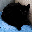

In [16]:
i = np.random.choice(range(len(y_train)))
display(y_train[i])
display(array_to_img(X_train_img[i].reshape(32,32,3)))

## HyperParameter Tuning with GridSearchCV & Keras

Original Source: https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/
<br><br>

- To use `GridSearchCV` or other similar functions in scikit-learn with a Keras neural network, we need to wrap our keras model in `keras.wrappers.scikit_learn`'s `KerasClassifier` and `KerasRegressor`.

1. To do this, we need to write a build function(`build_fn`) that creates our model such as `create_model`.
    - This function must accept whatever parameters you wish to tune. 
    - It also must have a default argument for each parameter.
    - This function must Return the model (and only the model)
    

```python

## Define the build function
def create_model(n_units=(50,25,7), activation='relu',final_activation='softmax',
                optimizer='adam'):
    
    ## Pro tip:save the local variables now so you can print out the parameters used to create the model.
    params_used = locals()
    print('Parameters for model:\n',params_used)
    
   
    from keras.models import Sequential
    from keras import layers
    
    model=Sequential()
    model.add(layers.Dense(n_units[0], activation=activation, input_shape=(2000,)))
    model.add(layers.Dense(n_units[1], activation=activation))
    model.add(layers.Dense(n_units[2], activation=final_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    
    display(model.summary())
    return model 
```    

2. We then create out model using the Keras wrapper:

```python
from keras.wrappers.scikit_learn import KerasClassifier
neural_network =  KerasClassifier(build_fn=create_model,verbose=1)
```

3. Now, set up the hyperparameter space for grid search. (Remember, your `create_model` function must accept the parameter you want to tune)

```python
params_to_test = {'n_units':[(50,25,7),(100,50,7)],
                  'optimizer':['adam','rmsprop','adadelta'],
                  'activation':['linear','relu','tanh'],
                  'final_activation':['softmax']}
```

4. Now instantiate your GridSearch function

```python
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=neural_network,param_grid=params_to_test)
grid_result = grid.fit(X_train, y_train)
best_params = grid_result.best_params_
```
5. And thats it!

In [44]:
class Timer():
    ## def init
    def __init__(self,format_="%m/%d/%y - %I:%M %p"):
        import tzlocal
        self.tz = tzlocal.get_localzone()
        self.fmt = format_
        
        self.created_at = self.get_time()# get time
        
    
    ## def get time method
    def get_time(self):
        import datetime as dt
        return dt.datetime.now(self.tz)

    ## def start
    def start(self):
        time = self.get_time()
        self.start = time
        print(f"[i] Timer started at{self.start.strftime(self.fmt)}")

        

    ## def stop
    def stop(self):
        time = self.get_time()
        self.end = time
        print(f"[i] Timer ended at {self.end.strftime(self.fmt)}")
        print(f"- Total time = {self.end-self.start}")

        
        
def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig



def plot_keras_history(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    """Plots keras history and returns fig"""
    ## Make a df from history
    plot_df = pd.DataFrame(history.history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


    ## Change xaxis locators 
    [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
    [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
X_train_img[0].shape

(3072,)

In [47]:
X_train_img.shape, y_train.shape

((7200, 3072), (7200, 2))

In [48]:
from keras.wrappers.scikit_learn import KerasClassifier

In [49]:
def make_model():
    model = Sequential()
    model.add(Dense(64,activation='relu',input_shape=(X_train_img.shape[1],)))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [50]:
model = KerasClassifier(make_model)
model

In [51]:
## Fit baseline model
timer = Timer()

timer.start()
history = model.fit(X_train_img, y_train, epochs=100, batch_size=64, 
                      validation_data=(X_val_img, y_val))
timer.stop()

[i] Timer started at06/01/20 - 08:50 PM
Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 0s 60us/step - loss: 0.6943 - accuracy: 0.5471 - val_loss: 0.6750 - val_accuracy: 0.5425
Epoch 2/100
7200/7200 [==============================] - 0s 22us/step - loss: 0.6696 - accuracy: 0.5883 - val_loss: 0.6661 - val_accuracy: 0.6037
Epoch 3/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.6611 - accuracy: 0.6010 - val_loss: 0.6597 - val_accuracy: 0.6037
Epoch 4/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.6520 - accuracy: 0.6110 - val_loss: 0.6597 - val_accuracy: 0.6062
Epoch 5/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.6464 - accuracy: 0.6174 - val_loss: 0.6644 - val_accuracy: 0.6062
Epoch 6/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.6398 - accuracy: 0.6292 - val_loss: 0.6529 - val_accuracy: 0.6062
Epoch 7/100
7200/7200 [==============

7200/7200 [==============================] - 0s 20us/step - loss: 0.4794 - accuracy: 0.7765 - val_loss: 1.0061 - val_accuracy: 0.5375
Epoch 57/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.4787 - accuracy: 0.7760 - val_loss: 0.6771 - val_accuracy: 0.6175
Epoch 58/100
7200/7200 [==============================] - 0s 22us/step - loss: 0.4800 - accuracy: 0.7725 - val_loss: 0.6670 - val_accuracy: 0.6288
Epoch 59/100
7200/7200 [==============================] - 0s 19us/step - loss: 0.4736 - accuracy: 0.7733 - val_loss: 0.6837 - val_accuracy: 0.6150
Epoch 60/100
7200/7200 [==============================] - 0s 21us/step - loss: 0.4630 - accuracy: 0.7812 - val_loss: 0.6743 - val_accuracy: 0.6237
Epoch 61/100
7200/7200 [==============================] - 0s 21us/step - loss: 0.4737 - accuracy: 0.7782 - val_loss: 0.8066 - val_accuracy: 0.5788
Epoch 62/100
7200/7200 [==============================] - 0s 19us/step - loss: 0.4607 - accuracy: 0.7849 - val_loss: 0.6916 - val_a

In [52]:
history

In [53]:
        
def evaluate_model(y_true, y_pred,history=None):
    """Evaluates neural network using sklearn metrics"""
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
#     try:    
    if history is not None:
        plot_keras_history(history)
#     except:
#         pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")

        
        



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.72      0.59      1000
           1       0.50      0.28      0.36      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.50      0.50      0.47      2000



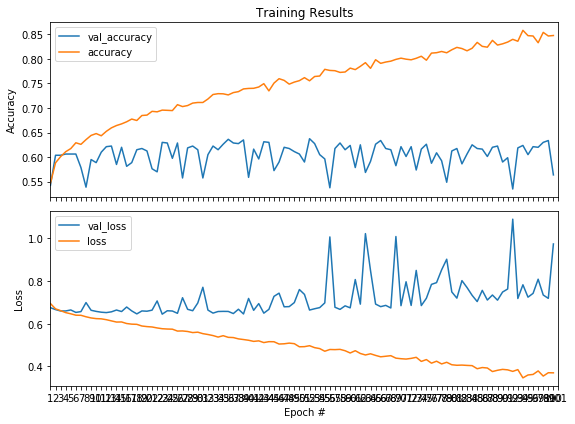

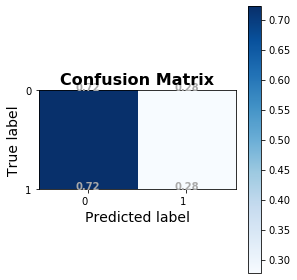

In [54]:
y_hat_test = model.predict(X_test_img)

evaluate_model(y_test,y_hat_test,history)

In [55]:
def make_fit_evaluate_model(build_fn, fit_params = dict(epochs=100,
                                                        batch_size=64)):
    model = build_fn()
    
    timer = Timer()
    model.summary()
    timer.start()
    
    history = model.fit(X_train_img, y_train,**fit_params,
                          validation_data=(X_val_img, y_val))
    timer.stop()
    
    y_hat_test = model.predict(X_test_img)
    evaluate_model(y_test,y_hat_test,history)
    return model,y_hat_test

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                196672    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
Total params: 196,802
Trainable params: 196,802
Non-trainable params: 0
_________________________________________________________________
[i] Timer started at06/01/20 - 08:50 PM
Train on 7200 samples, validate on 800 samples
Epoch 1/100
7200/7200 [==============================] - 0s 46us/step - loss: 0.7018 - accuracy: 0.5468 - val_loss: 0.6799 - val_accuracy: 0.5487
Epoch 2/100
7200/7200 [==============================] - 0s 29us/step - loss: 0.6779 - accuracy: 0.5750 - val_loss: 0.6647 - val_accuracy: 0.5850
Epoch 3/100
7200/7200 [==============================] - 0s 29us/step - loss: 0.6695 - accuracy: 0.5901 - val_loss: 0.6674 - val_ac

Epoch 52/100
7200/7200 [==============================] - 0s 30us/step - loss: 0.4967 - accuracy: 0.7625 - val_loss: 0.6511 - val_accuracy: 0.6313
Epoch 53/100
7200/7200 [==============================] - 0s 34us/step - loss: 0.4951 - accuracy: 0.7581 - val_loss: 0.6495 - val_accuracy: 0.6212
Epoch 54/100
7200/7200 [==============================] - 0s 32us/step - loss: 0.4934 - accuracy: 0.7594 - val_loss: 0.6596 - val_accuracy: 0.6363
Epoch 55/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.4863 - accuracy: 0.7644 - val_loss: 0.6561 - val_accuracy: 0.6275
Epoch 56/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.4932 - accuracy: 0.7586 - val_loss: 0.6620 - val_accuracy: 0.6300
Epoch 57/100
7200/7200 [==============================] - 0s 33us/step - loss: 0.4866 - accuracy: 0.7676 - val_loss: 0.7292 - val_accuracy: 0.5850
Epoch 58/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.4895 - accuracy: 0.7693 - val_loss: 0

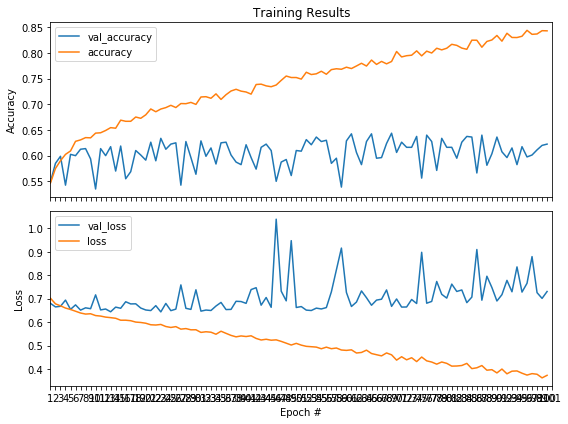

KeyboardInterrupt: 

In [56]:
fit_model,model_preds = make_fit_evaluate_model(make_model)

# APPENDIX/HOW-TOs:

## How to Make a Custom Scoring Function

1. **Why would you do this?**
    1. You may want to use a metric that isn't available in sklearn. 
        - In the included `my_custom_scorer` function, I take the accuracy of each class's predictions from the diagonal of a normalized confusion matrix. 
        - I then calculate the mean of those 3 class accuracies, which is the `score` that is returned to the gridsearch. 
        
    2. You may want to add a printout or display to the scoring function so you can see the results as the search is going.
<br><br>
2. **How do you do write your own?**
    1. Define your custom scoring function.
        - It must accept `y_true`,`y_pred`
        - It must return a value to maximize. (like accuracy)
    2. You can add print or display commands to have the scoring function report the current results as the gridsearch is still going.
        - If you combine this with the example `create_model` function above that includes the `vars=locals(); print(vars)` command, then gridsearch will display:
            1. the parameters of each model (each time the `create_model` function is called.
            2. The score of each model, including a confusion matrix figure (each time it calls `my_custom_scorer`).
        
```python
def my_custom_scorer(y_true,y_pred):
    """My custom score function to use with sklearn's GridSearchCV
    Maximizes the average accuracy per class using a normalized confusion matrix"""
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import functions_combined_BEST as ji    

    ## Flatten one-hot encoded target columns into 1 column for sklearn functions
    if y_true.ndim>1 or y_pred.ndim>1:
        
        ## reduce dimensions of y_train and y_test
        if y_true.ndim>1:            
            y_true = y_true.argmax(axis=1)
        
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)

    
     # Get confusion matrx
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    ## Get diagonals for class accuracy
    diag = cm_norm.diagonal()
    
    # Get the mean of the diagonal values
    score = np.mean(diag)
    
    ## Display Results for the User
    print(f'Mean Class Accuracy = {score}')
    print(f'Class Accuracy Values:')
    print(diag)    

    ## Plot the confusion matrix.
    ji.plot_confusion_matrix(cm,normalize=True)

    # return the score 
    return score
```        
        
        
3. **How do you use it?**
    - When instantiating GridSearchCV pass your function as the `scoring=` parameter, wrapped in the  `sklearn.metrics.make_scorer` function.
  

```python
## Using custom scoring function
from sklearn.metrics import make_scorer

grid = GridSearchCV(estimator=neural_network, 
                    param_grid=params_to_test,
                   scoring=make_scorer(my_custom_scorer))
                    
grid_result = grid.fit(X_train, y_train)
```